## Correlation in Python

In [1]:
# Importing Libraries

import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

# Read in the data

df = pd.read_csv(r"C:\Users\rafsa\OneDrive\Desktop\Pandas Alex\movies.csv")

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [4]:
# Finding Missing Values

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f"{col} - {pct_missing*100}%")
    print(df[col].isnull().value_counts(), "\n")

name - 0.0%
name
False    7668
Name: count, dtype: int64 

rating - 1.004173187271779%
rating
False    7591
True       77
Name: count, dtype: int64 

genre - 0.0%
genre
False    7668
Name: count, dtype: int64 

year - 0.0%
year
False    7668
Name: count, dtype: int64 

released - 0.02608242044861763%
released
False    7666
True        2
Name: count, dtype: int64 

score - 0.03912363067292645%
score
False    7665
True        3
Name: count, dtype: int64 

votes - 0.03912363067292645%
votes
False    7665
True        3
Name: count, dtype: int64 

director - 0.0%
director
False    7668
Name: count, dtype: int64 

writer - 0.03912363067292645%
writer
False    7665
True        3
Name: count, dtype: int64 

star - 0.013041210224308816%
star
False    7667
True        1
Name: count, dtype: int64 

country - 0.03912363067292645%
country
False    7665
True        3
Name: count, dtype: int64 

budget - 28.31246739697444%
budget
False    5497
True     2171
Name: count, dtype: int64 

gross - 2.46478

In [5]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [6]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [13]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [15]:
df.drop(columns='year', inplace = True)

In [17]:
# Create a new Correct Year Colum
df['year'] = df['released'].astype(str).str.extract(r'(\d{4})')

In [19]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [21]:
df.sort_values(by=['gross'], inplace=True, ascending=False)

In [23]:
df['company'].drop_duplicates().sort_values(ascending=False, inplace=False)

5101                                              thefyzz
3920                                          micro_scope
2551                                             i5 Films
4834                                           i am OTHER
4537                                                 erbp
2373                                       double A Films
2021                          Zucker Brothers Productions
296                                      Zoetrope Studios
1235                                   Zeta Entertainment
2302                              Zentropa Entertainments
624                                  Zenith Entertainment
3521                                      Zazen Produções
713                              Zanuck/Brown Productions
720                           Zacharias-Buhai Productions
434                             Young Sung Production Co.
3475                           Young Hannibal Productions
3780                                          Yellow Bird
3057          

In [25]:
# Data is ready for Creating Correlation
# High Budget Correlation
# Company High Correlation

Text(0, 0.5, 'Film Budget')

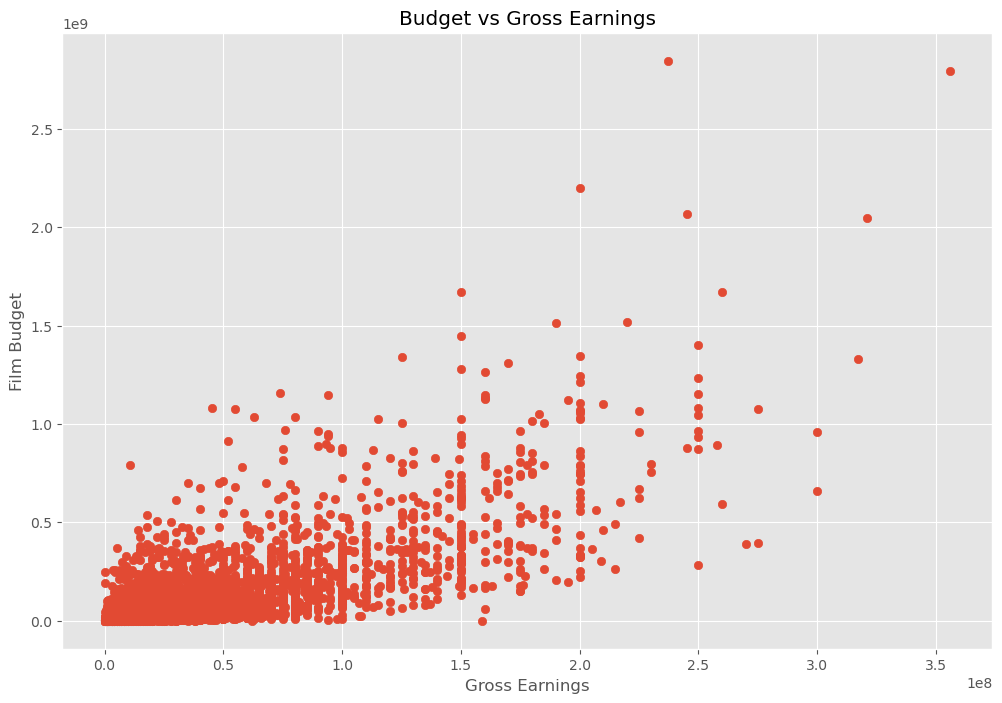

In [27]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'], )
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Film Budget')

In [29]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
3731,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
5302,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
1795,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
4730,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
5158,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


<Axes: xlabel='budget', ylabel='gross'>

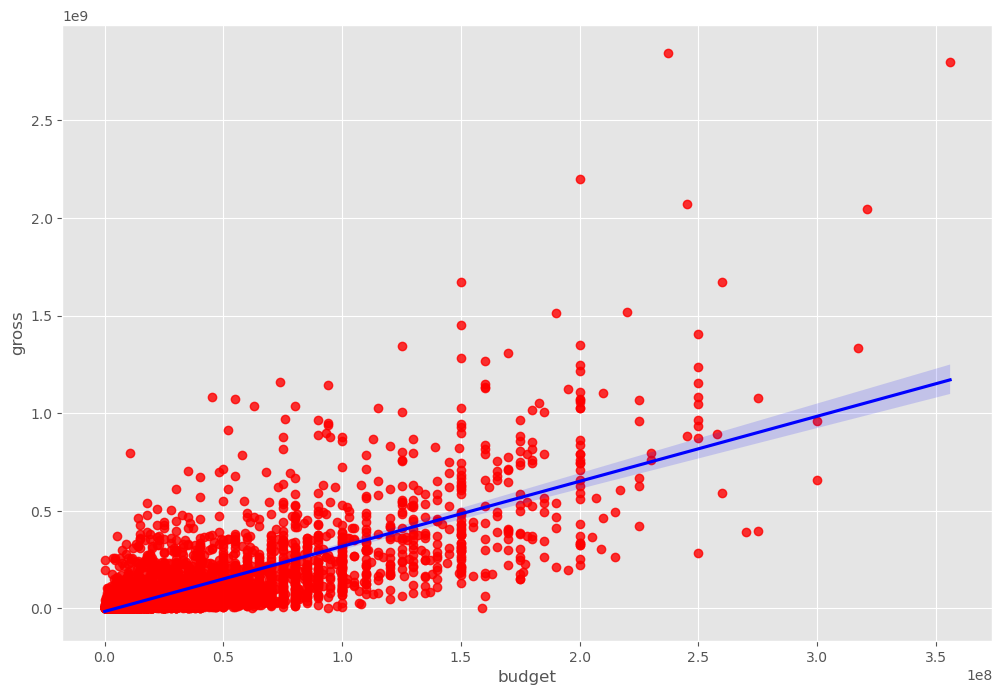

In [31]:
# Plot Budget vs Gross Using Seaborn

sns.regplot(x='budget', y='gross', data = df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [33]:
# Let's start Looking at correlation
df.corr(method='pearson',numeric_only=True) # Method: Pearson (default), kendall, spearman

,score,votes,budget,gross,runtime
score,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.414068,0.352303,0.318695,0.275796,1.000000


In [35]:
df.corr(method='kendall',numeric_only=True)

,score,votes,budget,gross,runtime
score,1.000000,0.350185,-0.006406,0.124943,0.292254
votes,0.350185,1.000000,0.346274,0.553625,0.205344
budget,-0.006406,0.346274,1.000000,0.512057,0.231278
gross,0.124943,0.553625,0.512057,1.000000,0.176979
runtime,0.292254,0.205344,0.231278,0.176979,1.000000


In [37]:
df.corr(method='spearman',numeric_only=True)

,score,votes,budget,gross,runtime
score,1.000000,0.495409,-0.009971,0.183192,0.412155
votes,0.495409,1.000000,0.493461,0.745793,0.300621
budget,-0.009971,0.493461,1.000000,0.692958,0.330794
gross,0.183192,0.745793,0.692958,1.000000,0.257400
runtime,0.412155,0.300621,0.330794,0.257400,1.000000


Text(120.72222222222221, 0.5, 'Movie Features')

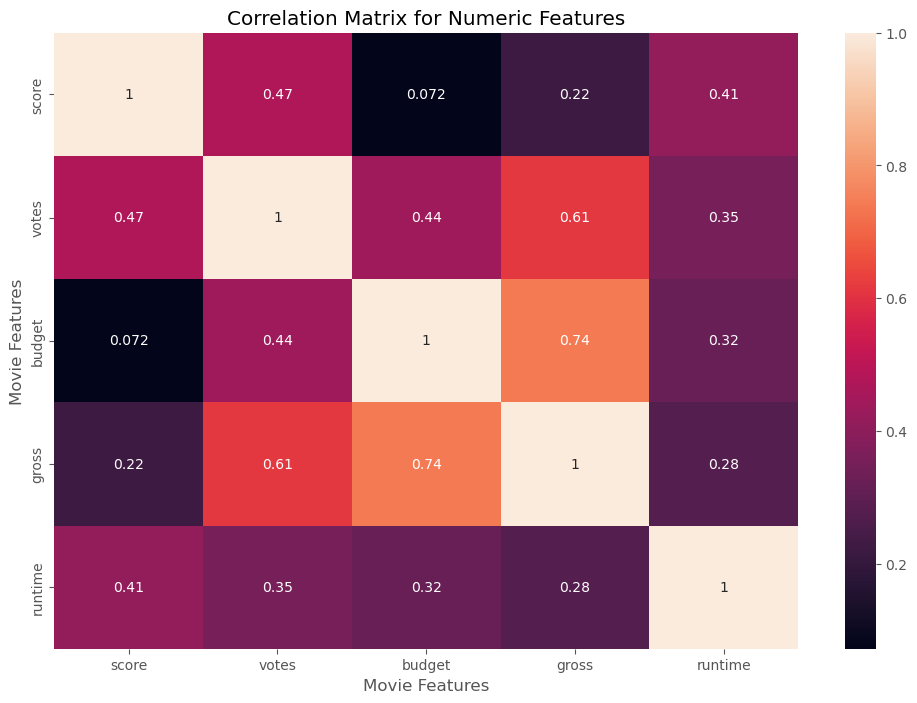

In [39]:
# High Correlation between budget and gross

corr_matrix = df.corr(method='pearson',numeric_only=True)
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [41]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head(10)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
3731,386,5,0,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,29
5302,388,5,0,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,39
1795,4909,5,6,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,17
4730,3643,5,0,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,35
5158,389,5,0,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,38
5334,4388,4,2,1126,6.9,222000,1012,1361,457,47,260000000,1670727580,1423,118,39
4720,2117,5,0,1303,7.0,593000,335,2523,293,47,150000000,1670516444,1397,124,35
4224,3878,5,0,1899,8.0,1300000,1060,1646,1470,47,220000000,1518815515,983,143,32
4713,1541,5,0,165,7.1,370000,809,481,1785,47,190000000,1515341399,1397,137,35
5346,1530,4,2,2053,6.8,148000,277,1383,1036,47,150000000,1450026933,1422,103,39


In [43]:
# Checking the validity of the numeric assignment
df_numerized[df_numerized['director'] == 785]

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
3731,386,5,0,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,29
1795,4909,5,6,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,17
999,3820,6,0,1212,8.5,1000000,785,1263,120,47,102000000,520881154,363,137,11
1386,4978,6,0,1088,7.2,243000,785,533,120,47,115000000,378882411,1382,141,14
441,221,6,0,1111,8.3,668000,785,1263,1617,46,18500000,131060248,1382,137,6
779,3841,5,1,445,7.5,167000,785,1263,476,47,70000000,90000098,1382,140,9
257,4754,6,0,2272,8.0,812000,785,1263,120,46,6400000,78371200,416,107,4


Text(120.72222222222221, 0.5, 'Movie Features')

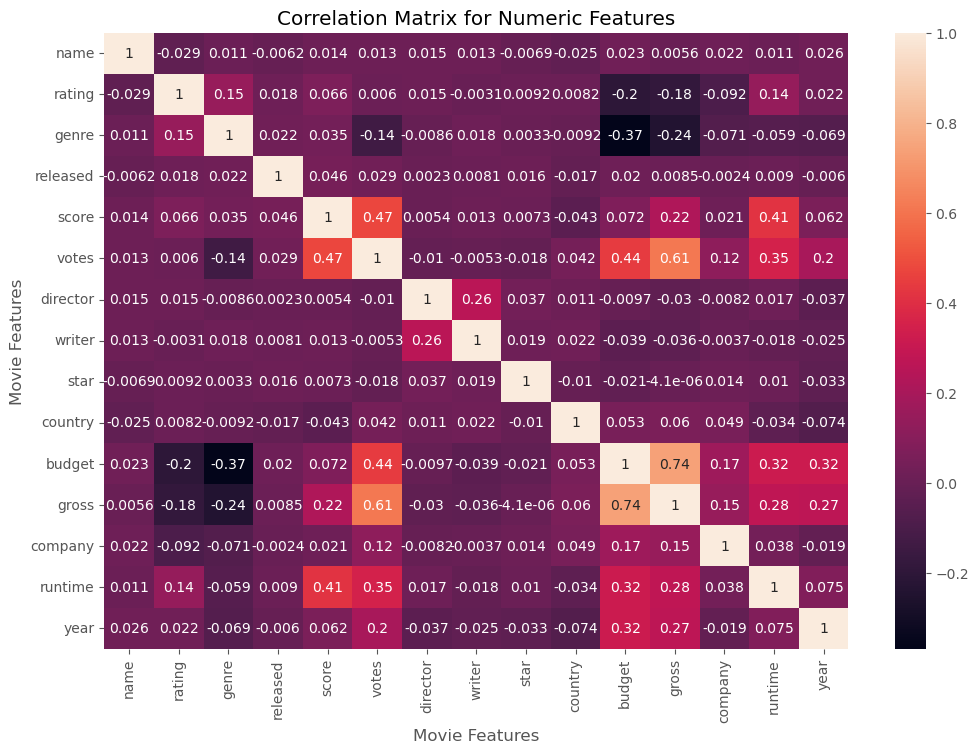

In [45]:
sns.heatmap(df_numerized.corr(), annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [47]:
df_numerized.corr()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
name,1.000000,-0.029234,0.010996,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.025542
rating,-0.029234,1.000000,0.147796,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.022021
genre,0.010996,0.147796,1.000000,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.069147
released,-0.006152,0.018083,0.022142,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,-0.005989
score,0.014450,0.065983,0.035106,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.061923
votes,0.012615,0.006031,-0.135990,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.203098
director,0.015246,0.014656,-0.008553,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.037371
writer,0.012880,-0.003149,0.017578,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.025495
star,-0.006882,0.009196,0.003341,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.032687
country,-0.025490,0.008230,-0.009164,-0.017228,-0.043051,0.041551,0.011133,0.022488,-0.009990,1.000000,0.052977,0.060078,0.048569,-0.034477,-0.073569


In [57]:
# Unstacking the values for better representation
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()

In [59]:
# Sorting and filtering the unstacked values
sorted_pairs = corr_pairs.sort_values(ascending=False)
sorted_pairs[(sorted_pairs > 0.45) & (sorted_pairs != 1)]

gross   budget    0.740247
budget  gross     0.740247
votes   gross     0.614751
gross   votes     0.614751
score   votes     0.474256
votes   score     0.474256
dtype: float64

In [61]:
# Budget vs Gross still has the highest Correlation
# Votes vs Gross is the second highest
# Numerized values don't really have any noticeable Correlations

# End of the Project